Name- Rohith Suresh
UB #= 50314902


# **Imports**

In [0]:
import numpy as np
# from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Processing Data**

In [0]:
url = "https://raw.githubusercontent.com/rohith788/ML-Proj1/master/wdbc.csv"
df1 = pd.read_csv(url, header = None)
del df1[0]
df1.columns = range(df1.shape[1]) #updating the index
sample_data = df1
y = df1[0]
del df1[0]
df1.columns = range(df1.shape[1]) #updating the index
#Splitting Test and Training Data
xTrain, xTest, yTrain, yTest = train_test_split(df1, y, test_size = 0.2, random_state = 0) 
#Splitting Training and Validation Data
xTest, xValidation, yTest, yValidation = train_test_split(xTest, yTest, test_size = 0.5,random_state = 0)

#Normalization
xTrain = xTrain.T
xTest = xTest.T
xValidation = xValidation.T
xTrain = (xTrain - min(xTrain))/(max(xTrain) - min(xTrain))
xTest = (xTest - min(xTest))/(max(xTest) - min(xTest))
xValidation = (xValidation - min(xValidation))/(max(xValidation) - min(xValidation))



# **Initializing Values**

In [0]:
def sigmoid(z):
  return (1/(np.exp(-z) + 1))

weight = np.random.rand(xTrain.shape[0])
learn_rate = 0.05
validation_array = []
train_array = []
loss_arrt = []
loss_arrv = []
epoch = 10000

# **Training & Validation**

In [0]:
bias = np.random.rand(1)
for i in range(epoch):
  z = np.dot(weight.T, xTrain) + bias
  h = sigmoid(z)
  #Updating Weight
  weight_diff = (yTrain - h)
  new_weight = -(np.dot(weight_diff,xTrain.T)/yTrain.shape[0])
  weight -= new_weight * learn_rate

  #Updating Bias
  new_bias = (h - yTrain)/yTrain.shape[0]
  new_bias = np.array(np.sum(new_bias))
  bias -= new_bias * learn_rate




  #Measuring Training accuracy
  z1 = np.dot(weight.T, xTrain) +bias
  h1 = sigmoid(z1)
  h1 = np.array(h1)
  boundry = 0.5
  y = np.array(yTrain)
  y_val = np.array(yValidation)
  train_c = 0
  val_c = 0

  #Loss Function For Testing
  loss = -(np.dot(yTrain, np.log(h1))+(np.dot((1-yTrain),(np.log(1-h1)))))/yTrain.shape[0]
  loss_arrt.append(loss)

  for j in range(h1.shape[0]):
    if (h1[j] >= boundry):
      h1[j] = 1
    else:
      h1[j] = 0


  for i in range(yTrain.shape[0]):
    if (y[i] == h1[i]):
      train_c += 1 
  train_accuracy = (train_c/len(y))*100


  #Validation Testing
  z2 = np.dot(weight.T, xValidation) + bias
  h2 = sigmoid(z2)
  h2 = np.array(h2)
  
  #Loss Function For Validation
  loss = -(np.dot(yValidation, np.log(h2))+(np.dot((1-yValidation),(np.log(1-h2)))))/yValidation.shape[0]
  loss_arrv.append(loss)
  for j in range(h2.shape[0]):
    if (h2[j] >= boundry):
      h2[j] = 1
    else:
      h2[j] = 0
  for i in range(yValidation.shape[0]):
    if (y_val[i] == h2[i]):
      val_c += 1
   
  val_accuracy = (val_c/len(y_val))*100
  train_array.append(train_accuracy)
  validation_array.append(val_accuracy)


# **Accuracy Graph**

91.42857142857143
87.71929824561403


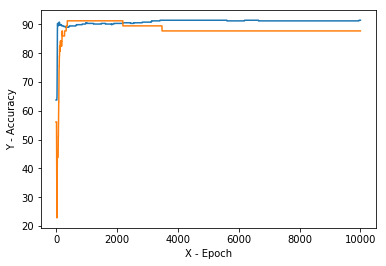

In [68]:
epoch1 = []
for i in range(epoch):
  epoch1.append(i)
  
plt.plot(epoch1, np.array(train_array))
plt.plot(epoch1,np.array(validation_array))
plt.xlabel("X - Epoch")
plt.ylabel("Y - Accuracy")

print(train_accuracy)
print(val_accuracy)

# **Loss Function Graph**

[1.297666130545106, 1.2539711357017105, 1.211885096090625, 1.171463791080753, 1.1327585943337035, 1.0958154283067998, 1.0606736564223223, 1.027364935889876, 0.9959120647413059, 0.9663278683423814, 0.9386141822809859, 0.9127609983465749, 0.8887458461409448, 0.8665334824044179, 0.8460759514421335, 0.8273130620115603, 0.8101732990286101, 0.7945751546089048, 0.7804288262434759, 0.7676381956031105, 0.7561029751731592, 0.7457208962153098, 0.7363898127438393, 0.7280096116729285, 0.7204838456968641, 0.7137210377362049, 0.7076356385040476, 0.7021486474084554, 0.6971879287601211, 0.6926882690572281, 0.6885912274220181, 0.6848448314618021, 0.6814031667109931, 0.6782259011380174, 0.6752777784407606, 0.6725281060832512, 0.669950256932018, 0.6675211972947049, 0.6652210492670839, 0.6630326915211103, 0.6609413998906044, 0.6589345271682286, 0.6570012202475306, 0.6551321719700691, 0.6533194046356432, 0.6515560819940763, 0.6498363465746255, 0.648155179359622, 0.646508279025563, 0.6448919582244586, 0.6433

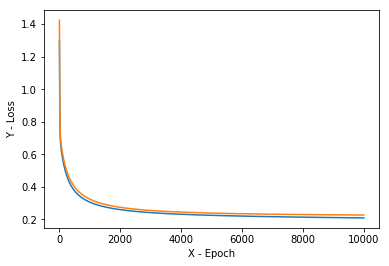

In [69]:
plt.plot(epoch1,np.array(loss_arrt))
plt.plot(epoch1,np.array(loss_arrv))
print(loss_arrt)
plt.xlabel("X - Epoch")
plt.ylabel("Y - Loss")
plt.show()

# **Testing**

In [70]:
z = np.dot(weight.T, xTest) + bias
h = sigmoid(z)
h = np.array(h)
boundry = 0.5
TP = 0
TN = 0
FP = 0
FN = 0
TPv = 0
TNv = 0
FPv = 0
FNv = 0
for j in range(h.shape[0]):
  if (h[j] >= boundry):
    h[j] = 1
  else:
    h[j] = 0
y_test = np.array(yTest)
for i in range(yTest.shape[0]):
  if (y_test[i] == h[i] and h[i] == 1):
    TP += 1  
  elif (y_test[i] == h[i] and h[i] == 0):
    TN += 1
  elif (y_test[i] != h[i] and h[i] == 1):
    FP += 1
  elif (y_test[i] != h[i] and h[i] == 0):
    FN += 1
  
  

accuracy = (TP + TN)/(TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)

print("Test Accuracy -", accuracy)
print("Precision -", precision)
print("Recall -", recall)

Test Accuracy - 0.9824561403508771
Precision - 1.0
Recall - 0.9714285714285714
